<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
input received from the dataset

### Hidden Layer:
perform their functions inside the network(can't interact with them)

### Output Layer:
final layer that provides a vector 

### Neuron:
takes inputs, weights them, return output

### Weight:
parameters used within the hidden layers that transform the input

### Activation Function:
transforms the output in a specific format for our context

### Node Map:
hows the number of input layers, hidden layers, and output layers

### Perceptron:
simple neuron



## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### takes inputs from dataset, applies weights to transform inputs to be output in the form specified by activation function

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [2]:
##### Your Code Here #####
inputs = df.to_numpy()
inputs

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 0]])

In [3]:
import numpy as np
# Define sigmoid function
def sigmoid(x):
  return 1 / (1+np.exp(-x))

# Define derivative of sigmoid
def sigmoid_derivative(x):
  sx = sigmoid(x)
  return sx * (1-sx)

In [4]:
correct_outputs = [[1], [1], [1], [0]]

In [5]:
weights = 2*np.random.random((3,1)) - 1
weights

array([[ 0.86484227],
       [-0.11251886],
       [-0.77493222]])

In [6]:
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-2.40848055]
 [-2.41189143]
 [ 7.49009898]]
Output after training
[[0.99944168]
 [0.99382816]
 [0.9938072 ]
 [0.00799969]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [7]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feats = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'bias']
target = 'Outcome'
# introducing bias into familiar machine learning workflows as part of the neural network
diabetes['bias'] = np.ones(diabetes.shape[0])

#converting our pandas dataframe into split numpy arrays into features and target
X = diabetes[feats].to_numpy()
y = diabetes[target].to_numpy()
y = y * 2 - 1

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
class Perceptron(object):
    
    def __init__(self, rate = 0.1, niter = 10):
        self.rate = rate
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-X))
    
    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(X)
        return sx * (1-sx)

    def fit(self, X, y):
        """
        Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        
        # Randomly Initialize Weights
        #assign weights of 0 for the length of features + 1 (bias)
        self.weight = np.zeros(1 + X.shape[1])
        
            
        #initialize errors
        self.errors = []


        for i in range(self.niter):
            #reset errors for function calling
            err = 0
            for xi, target in zip(X, y):
                #for loop that breaks out for each prediction
                
                #the delta for each pass
                delta_w = self.rate * (target - self.predict(xi))
                # Weighted sum of inputs / weights
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self


    def weighted_sum(self, X):
        """Calculate weighted sum of neuron"""
        """The dot product of an input times the weights plus a bias"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Returns what the class is for the logic gate, 0 or 1 based on if the prediction is above or below 0.5"""
        return np.where(self.weighted_sum(X) >= 0.0, 1, -1)

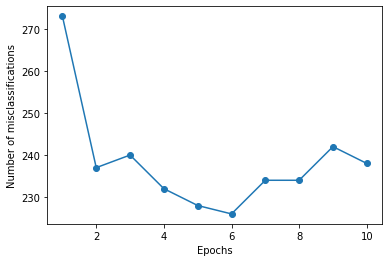

In [11]:
#initializating the perceptron class
import matplotlib.pyplot as plt

nn = Perceptron()

#fitting on the diabetes data
nn.fit(X_scaled,y)
plt.plot(range(1, len(nn.errors) + 1), nn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?